In [25]:
from typing import Text, List
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import pathlib

from options_freedom.symbol.vix import vix

In [26]:
def files_in_path(path: Text) -> List[Text]:
    path = pathlib.Path.cwd().joinpath(path)
    return [f for f in listdir(path) if isfile(join(path, f)) and f[-3:] == "gth"]

# open methods
dir_path = os.getcwd()
def gen_results_path(filename: str):
    return os.path.join(dir_path, "", filename)

In [27]:
files = files_in_path("")
files

['IronCondor_30_16_45_15_100_50_ligth',
 'IronCondor_30_16_45_20_200_25_ligth',
 'IronCondor_16_5_45_15_100_25_ligth',
 'IronCondor_30_16_45_15_200_50_ligth',
 'IronCondor_30_16_45_15_200_75_ligth',
 'IronCondor_30_16_45_15_100_25_ligth',
 'IronCondor_30_16_45_20_100_75_ligth',
 'IronCondor_30_16_45_15_100_75_ligth',
 'IronCondor_30_16_45_20_200_50_ligth',
 'IronCondor_30_16_45_15_200_25_ligth',
 'IronCondor_30_16_45_20_100_25_ligth',
 'IronCondor_30_16_45_20_100_50_ligth']

In [28]:
files[1][20:22]

'20'

### Filter under certain VIX

In [29]:
VIX = "20"

In [30]:
files = [f for f in files if f[20:22] == VIX]
len(files)

5

In [31]:
data_set = {}
for file in files:
    with open(gen_results_path(file), "rb") as f:
        trades = pickle.load(f)
        data_set[file] = trades

### Plotting

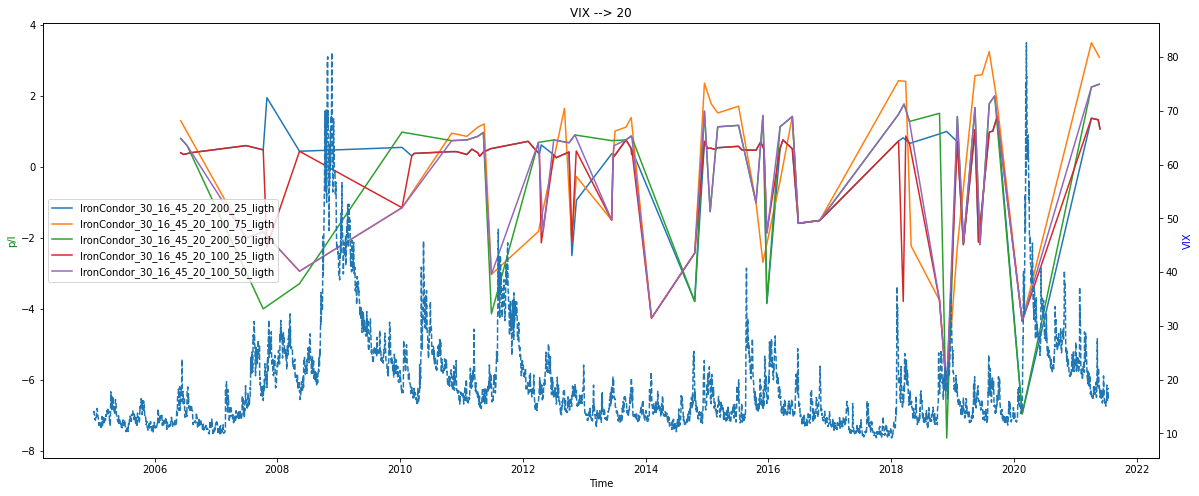

In [32]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax2 = ax1.twinx()
for strategy, d_s in data_set.items():
    dates = list(d_s.keys())
    profits = [t['profit_loss'] for t in d_s.values()]
    ax1.plot(dates, profits, label=strategy)
ax2.plot(vix._df['time_stamp'], vix._df['bid'], '--')

ax1.legend(loc='center left')
ax1.set_xlabel('Time')
ax1.set_ylabel('p/l', color='g')
ax2.set_ylabel('VIX', color='b')

plt.title(f"VIX --> {VIX}")
plt.show()

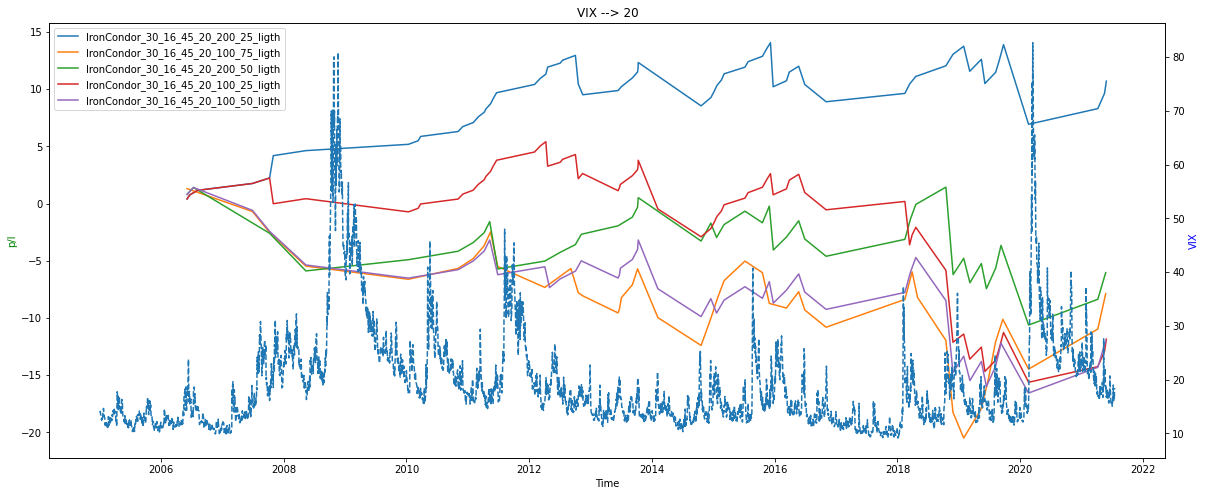

In [33]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax2 = ax1.twinx()
for strategy, d_s in data_set.items():
    dates = list(d_s.keys())
    profits = [t['profit_loss'] for t in d_s.values()]
    p_l_cumm = np.cumsum(profits)
    ax1.plot(dates, p_l_cumm, label=strategy)
ax2.plot(vix._df['time_stamp'], vix._df['bid'], '--')

ax1.legend(loc='upper left')
ax1.set_xlabel('Time')
ax1.set_ylabel('p/l', color='g')
ax2.set_ylabel('VIX', color='b')

plt.title(f"VIX --> {VIX}")
plt.show()

In [34]:
for strategy, d_s in data_set.items():
    profits = [t['profit_loss'] for t in d_s.values()]
    total_p_l = sum([x for x in profits if x is not None])
    print(f'{strategy} - Total P/L: {total_p_l}')

IronCondor_30_16_45_20_200_25_ligth - Total P/L: 10.69
IronCondor_30_16_45_20_100_75_ligth - Total P/L: -7.880000000000003
IronCondor_30_16_45_20_200_50_ligth - Total P/L: -6.040000000000001
IronCondor_30_16_45_20_100_25_ligth - Total P/L: -11.850000000000001
IronCondor_30_16_45_20_100_50_ligth - Total P/L: -11.979999999999995


In [35]:
for strategy, d_s in data_set.items():
    profits = [t['profit_loss'] for t in d_s.values()]
    total_p_l = sum([x for x in profits if x is not None])
    average_profit = total_p_l / len(profits)
    print(f'{strategy} - Average profit: {average_profit}')

IronCondor_30_16_45_20_200_25_ligth - Average profit: 0.15955223880597014
IronCondor_30_16_45_20_100_75_ligth - Average profit: -0.17909090909090916
IronCondor_30_16_45_20_200_50_ligth - Average profit: -0.1372727272727273
IronCondor_30_16_45_20_100_25_ligth - Average profit: -0.16928571428571432
IronCondor_30_16_45_20_100_50_ligth - Average profit: -0.24448979591836725


In [36]:
for strategy, d_s in data_set.items():
    average_max_loss = sum([t['max_loss'] for t in d_s.values()]) / len(list(d_s.values()))
    print(f'{strategy} - Average max loss: {average_max_loss}')
    
average_max_loss = sum([t['max_loss'] for t in trades.values()]) / len(list(trades.values()))
print(f"Average max loss: {average_max_loss}")

IronCondor_30_16_45_20_200_25_ligth - Average max loss: 8.191940298507472
IronCondor_30_16_45_20_100_75_ligth - Average max loss: 8.909545454545457
IronCondor_30_16_45_20_200_50_ligth - Average max loss: 8.761818181818184
IronCondor_30_16_45_20_100_25_ligth - Average max loss: 8.144285714285722
IronCondor_30_16_45_20_100_50_ligth - Average max loss: 8.651428571428575
Average max loss: 8.651428571428575


In [37]:
for strategy, d_s in data_set.items():
    average_max_profit = sum([t['max_profit'] for t in d_s.values()]) / len(list(trades.values()))
    print(f'{strategy} - Average max profit: {average_max_profit}')

IronCondor_30_16_45_20_200_25_ligth - Average max profit: 2.7683673469387746
IronCondor_30_16_45_20_100_75_ligth - Average max profit: 1.9618367346938774
IronCondor_30_16_45_20_200_50_ligth - Average max profit: 1.9608163265306124
IronCondor_30_16_45_20_100_25_ligth - Average max profit: 2.8983673469387745
IronCondor_30_16_45_20_100_50_ligth - Average max profit: 2.128367346938776


In [38]:
for strategy, d_s in data_set.items():
    average_trade_length = sum([(t['finish_stamp'] - t['start_stamp']).days for t in d_s.values()]) / len(list(d_s.values()))
    print(f'{strategy} - Average trade in days: {average_trade_length}')

IronCondor_30_16_45_20_200_25_ligth - Average trade in days: 24.55223880597015
IronCondor_30_16_45_20_100_75_ligth - Average trade in days: 33.36363636363637
IronCondor_30_16_45_20_200_50_ligth - Average trade in days: 32.11363636363637
IronCondor_30_16_45_20_100_25_ligth - Average trade in days: 22.37142857142857
IronCondor_30_16_45_20_100_50_ligth - Average trade in days: 28.571428571428573


In [39]:
for strategy, d_s in data_set.items():
    profits = [t['profit_loss'] for t in d_s.values()]
    total_p_l = sum([x for x in profits if x is not None])
    average_profit = total_p_l / len(profits)
    average_max_loss = sum([t['max_loss'] for t in d_s.values()]) / len(list(d_s.values()))
    average_trade_length = sum([(t['finish_stamp'] - t['start_stamp']).days for t in d_s.values()]) / len(list(d_s.values()))
    average_return_per_month = ((average_profit / average_trade_length) / average_max_loss) * 30  # profit per day / investment * 30 days
    print(f'{strategy} - Average return per month: {average_return_per_month * 100} %')

IronCondor_30_16_45_20_200_25_ligth - Average return per month: 2.379831885864115 %
IronCondor_30_16_45_20_100_75_ligth - Average return per month: -1.8074482381272046 %
IronCondor_30_16_45_20_200_50_ligth - Average return per month: -1.4635979573071733 %
IronCondor_30_16_45_20_100_25_ligth - Average return per month: -2.7873714432031464 %
IronCondor_30_16_45_20_100_50_ligth - Average return per month: -2.967305151915453 %
